In [32]:
import pandas as pd

In [33]:
diabetes=pd.read_csv("../dados/pima-indians-diabetes data.csv", sep=",")
diabetes

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1.0
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0.0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63,0.0
764,2.0,122.0,70.0,27.0,NaN,36.8,0.340,27,0.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30,0.0
766,1.0,126.0,60.0,NaN,NaN,30.1,0.349,47,1.0


## Para imputar valores mais simples basta usarmos funções do pandas como fillna(). Temos vários métodos simples de imputação:
1. Média
2. Mediana
3. Valor mais frequente(para variáveis categóricas)
4. Valor constante. Ex: 0,1,etc..

In [34]:
diabetes.isna().mean()

Pregnant             0.000000
Glucose              0.006510
Diastolic_BP         0.045573
Skin_Fold            0.295573
Serum_Insulin        0.486979
BMI                  0.014323
Diabetes_Pedigree    0.000000
Age                  0.000000
Class                0.000000
dtype: float64

In [35]:
# Média
diabetes["Serum_Insulin"].fillna(diabetes["Serum_Insulin"].mean(), inplace=True)
# Mediana
diabetes["Diastolic_BP"].fillna(diabetes["Diastolic_BP"].median(), inplace=True)
diabetes["Glucose"].fillna(diabetes["Glucose"].median(), inplace=True)
# Valor mais frequente
diabetes["Skin_Fold"].fillna(diabetes["Skin_Fold"].mode()[0], inplace=True)
# Valor constante
diabetes["BMI"].fillna(0, inplace=True)

In [36]:
diabetes.isna().mean()

Pregnant             0.0
Glucose              0.0
Diastolic_BP         0.0
Skin_Fold            0.0
Serum_Insulin        0.0
BMI                  0.0
Diabetes_Pedigree    0.0
Age                  0.0
Class                0.0
dtype: float64

## Métodos de imputação para dados de séries temporais. Usando novamente a função fillna() temos os métodos mais comuns:
1. ffill: Substitui o valor faltante pelo último valor não faltante)
2. bfill: Substitui o valor faltante pelo próximo valor não faltante)
3. Interpolate-Linear: Substitui os valores faltantes por valores igualmente espaçados entre valores não faltantes
4. Interpolate-Quadratic: Substitui os valores faltantes por valores distribuidos por uma equação não linear de segunda ordem entre valores não faltantes
4. Interpolate-Nearest: Substitui os valores faltantes pelo valor não faltante do vizinho mais próximo(de acordo com a ordem das linhas)

In [37]:
airquality = pd.read_csv('../dados/air-quality.csv')
airquality.head()

,Date,Ozone,Solar,Wind,Temp
0,1976-05-01,41.0,190.0,7.4,67
1,1976-05-02,36.0,118.0,8.0,72
2,1976-05-03,12.0,149.0,12.6,74
3,1976-05-04,18.0,313.0,11.5,62
4,1976-05-05,NaN,NaN,14.3,56


In [38]:
airquality.isna().mean()

Date     0.000000
Ozone    0.241830
Solar    0.045752
Wind     0.000000
Temp     0.000000
dtype: float64

<AxesSubplot:title={'center':'Ozone'}>

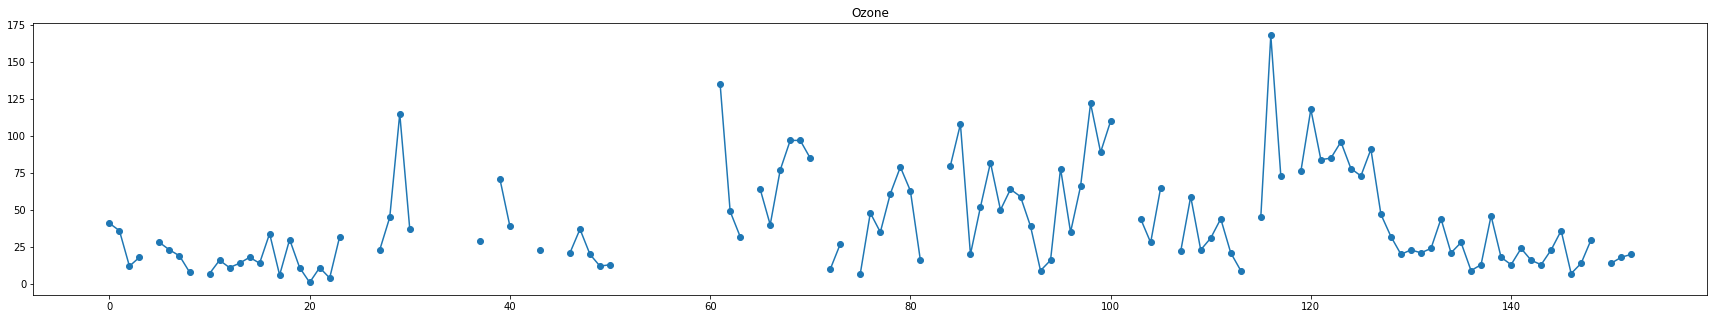

In [39]:
airquality['Ozone'].plot(title='Ozone', marker='o', figsize=(30, 5))

### Método ffill

In [40]:
airquality['Ozone'][30:40]

30    37.0
31     NaN
32     NaN
33     NaN
34     NaN
35     NaN
36     NaN
37    29.0
38     NaN
39    71.0
Name: Ozone, dtype: float64

In [41]:
airquality['Ozone'][30:40].fillna(method='ffill')

30    37.0
31    37.0
32    37.0
33    37.0
34    37.0
35    37.0
36    37.0
37    29.0
38    29.0
39    71.0
Name: Ozone, dtype: float64

<AxesSubplot:title={'center':'Ozone'}>

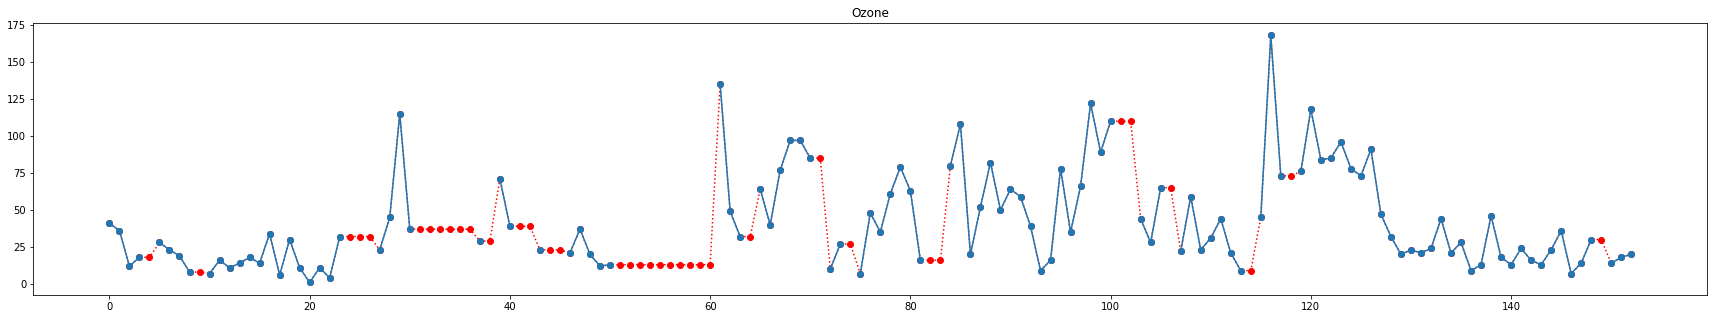

In [42]:
ffill_imp=airquality.fillna(method="ffill")
ffill_imp['Ozone'].plot(color='red', marker='o', linestyle='dotted', figsize=(30, 5))
airquality['Ozone'].plot(title='Ozone', marker='o')

### Método bfill

In [43]:
airquality['Ozone'][30:40]

30    37.0
31     NaN
32     NaN
33     NaN
34     NaN
35     NaN
36     NaN
37    29.0
38     NaN
39    71.0
Name: Ozone, dtype: float64

In [44]:
airquality['Ozone'][30:40].fillna(method='bfill')

30    37.0
31    29.0
32    29.0
33    29.0
34    29.0
35    29.0
36    29.0
37    29.0
38    71.0
39    71.0
Name: Ozone, dtype: float64

<AxesSubplot:title={'center':'Ozone'}>

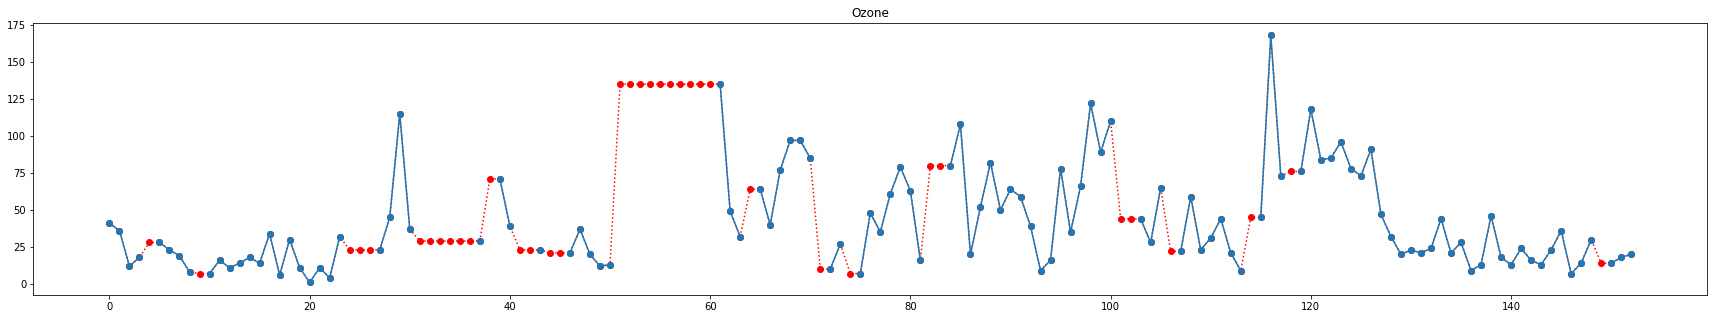

In [45]:
bfill_imp=airquality.fillna(method="bfill")
bfill_imp['Ozone'].plot(color='red', marker='o', linestyle='dotted', figsize=(30, 5))
airquality['Ozone'].plot(title='Ozone', marker='o')

### Função interpolate-Linear

In [46]:
airquality['Ozone'][30:40]

30    37.0
31     NaN
32     NaN
33     NaN
34     NaN
35     NaN
36     NaN
37    29.0
38     NaN
39    71.0
Name: Ozone, dtype: float64

In [47]:
airquality['Ozone'][30:40].interpolate(method='linear')

30    37.000000
31    35.857143
32    34.714286
33    33.571429
34    32.428571
35    31.285714
36    30.142857
37    29.000000
38    50.000000
39    71.000000
Name: Ozone, dtype: float64

<AxesSubplot:title={'center':'Ozone'}>

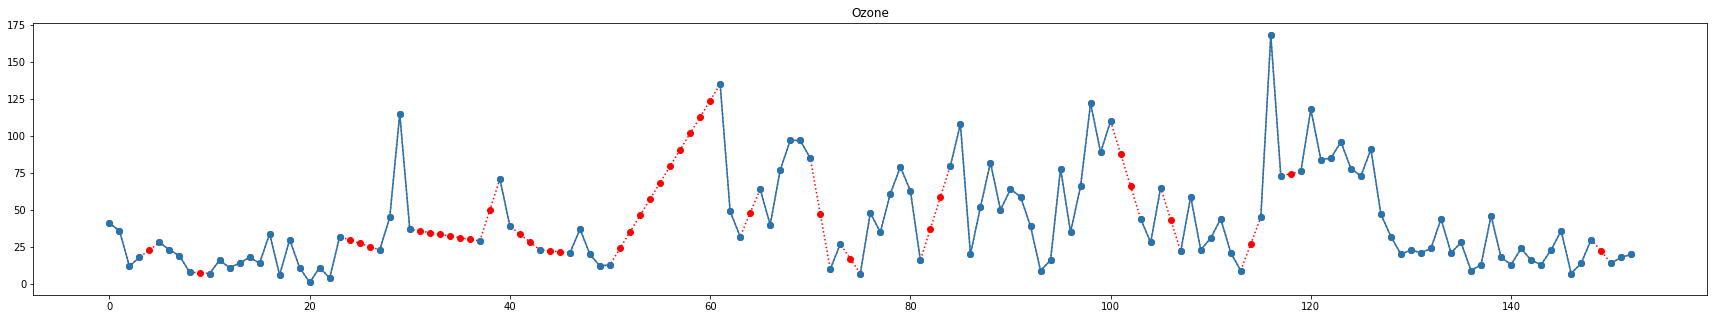

In [48]:
linear_interp=airquality.interpolate(method="linear")
linear_interp['Ozone'].plot(color='red', marker='o', linestyle='dotted', figsize=(30, 5))
airquality['Ozone'].plot(title='Ozone', marker='o')

### Função interpolate-Quadratic

In [49]:
airquality['Ozone'][30:40]

30    37.0
31     NaN
32     NaN
33     NaN
34     NaN
35     NaN
36     NaN
37    29.0
38     NaN
39    71.0
Name: Ozone, dtype: float64

In [50]:
airquality['Ozone'].interpolate(method='quadratic')[30:40]

30    37.000000
31   -38.361123
32   -79.352735
33   -85.974836
34   -62.354606
35   -33.255133
36    -2.803598
37    29.000000
38    62.155660
39    71.000000
Name: Ozone, dtype: float64

<AxesSubplot:title={'center':'Ozone'}>

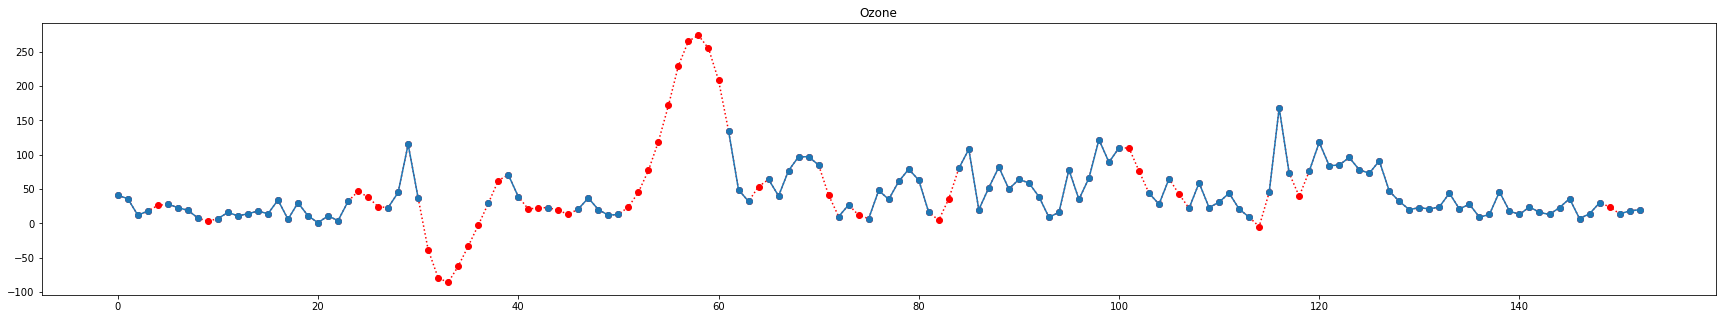

In [51]:
quadratic_interp=airquality.interpolate(method="quadratic")
quadratic_interp['Ozone'].plot(color='red', marker='o', linestyle='dotted', figsize=(30, 5))
airquality['Ozone'].plot(title='Ozone', marker='o')

### Função interpolate-Nearest

In [52]:
airquality['Ozone'][30:40]

30    37.0
31     NaN
32     NaN
33     NaN
34     NaN
35     NaN
36     NaN
37    29.0
38     NaN
39    71.0
Name: Ozone, dtype: float64

In [53]:
airquality['Ozone'][30:40].interpolate(method='nearest')

30    37.0
31    37.0
32    37.0
33    37.0
34    29.0
35    29.0
36    29.0
37    29.0
38    29.0
39    71.0
Name: Ozone, dtype: float64

<AxesSubplot:title={'center':'Ozone'}>

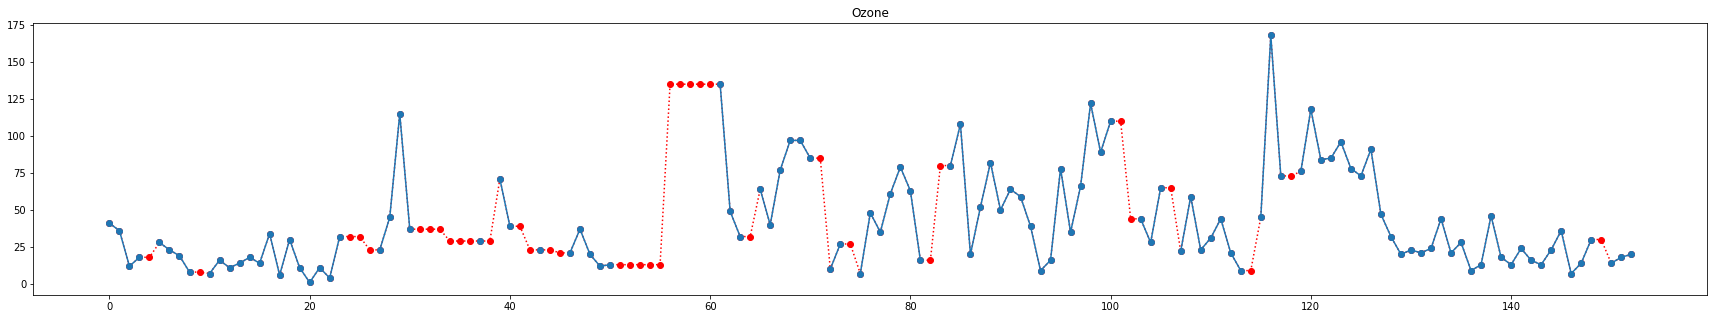

In [54]:
nearest_interp=airquality.interpolate(method="nearest")
nearest_interp['Ozone'].plot(color='red', marker='o', linestyle='dotted', figsize=(30, 5))
airquality['Ozone'].plot(title='Ozone', marker='o')